In [2]:
# importing required modules
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os
import scipy.stats
import datetime as dt
import urllib2 as url
from zipfile import ZipFile
from StringIO import StringIO

Populating the interactive namespace from numpy and matplotlib


In [18]:
#importing CSV citibike data for January 2015
a = url.urlopen("https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip").read()
file= ZipFile(StringIO(a))
citibikedata = file.open("201501-citibike-tripdata.csv")
w_data = pd.read_csv(citibikedata)

#importing CSV citibike data for february 2015
b = url.urlopen("https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip").read()
file= ZipFile(StringIO(b))
citibikedata2 = file.open("201502-citibike-tripdata.csv")
w2_data = pd.read_csv(citibikedata2)

#importing CSV citibike data for September 2014
c = url.urlopen("https://s3.amazonaws.com/tripdata/201409-citibike-tripdata.zip").read()
file= ZipFile(StringIO(c))
citibikedata3 = file.open("201409-citibike-tripdata.csv")
f_data = pd.read_csv(citibikedata3)

#importing CSV citibike data for October 2014
d = url.urlopen("https://s3.amazonaws.com/tripdata/201410-citibike-tripdata.zip").read()
file= ZipFile(StringIO(d))
citibikedata4 = file.open("201410-citibike-tripdata.csv")
f2_data = pd.read_csv(citibikedata4)

In [19]:
#appending all 4 Datasets into a single dataframe
winfall = w_data.append([w2_data, f_data, f2_data])
print winfall.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [20]:
#calculating the age form dataframe
winfall.age = 2015-winfall['birth year'][(winfall['usertype'] == 'Subscriber')]

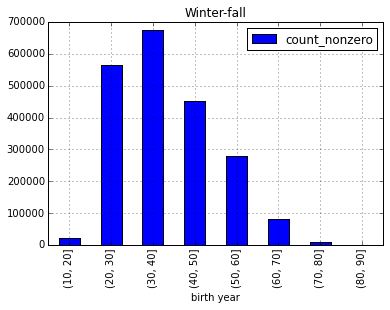

In [21]:
#Plotting the info with a 10 year bin distribution
bins = np.arange(10, 99, 10)
winfall.age.groupby(pd.cut(winfall.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter-fall", grid=True)
winfall.age_dist = winfall.age.groupby(pd.cut(winfall.age, bins)).agg([count_nonzero])

In [23]:
#Calculating KS statistic for a normal fit
ksW=scipy.stats.kstest(winfall.age_dist, 'norm')
print "winter and fall, normal fit", ksW

winter and fall, normal fit (1.0, 0.0)


In [24]:
#Calculating KS statistic for a Poisson fit
ksW1=scipy.stats.kstest(winfall.age_dist, 'cauchy')
print "winter and fall, poisson fit", ksW1

winter and fall, poisson fit (0.99999952913574597, 0.0)


In [27]:
#Calculating anderson statistic for normal fit 
andtst = scipy.stats.anderson(winfall.age.dropna(), dist='norm')
print "winter and fall, normal fit", andtst

winter and fall, normal fit (26876.318482238799, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [28]:
#Calculating anderson statistic for poisson fit 
andtst1 = scipy.stats.anderson(winfall.age.dropna(), dist='expon')
print "winter and fall, exponential fit", andtst1

winter and fall, exponential fit (489361.87810696661, array([ 0.922,  1.078,  1.341,  1.606,  1.957]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


As a result of both KS and anderson tests we can confirm that for the fall winter period the age of the subscribers do not fit like a normal, a poisson or a exponential distributions

In [3]:
#importing CSV citibike data for April 2015
e = url.urlopen("https://s3.amazonaws.com/tripdata/201504-citibike-tripdata.zip").read()
file= ZipFile(StringIO(e))
citibikedata5 = file.open("201504-citibike-tripdata.csv")
sp_data = pd.read_csv(citibikedata5)

#importing CSV citibike data for May 2015
f = url.urlopen("https://s3.amazonaws.com/tripdata/201505-citibike-tripdata.zip").read()
file= ZipFile(StringIO(f))
citibikedata6 = file.open("201505-citibike-tripdata.csv")
sp2_data = pd.read_csv(citibikedata6)

#importing CSV citibike data for June 2015
g = url.urlopen("https://s3.amazonaws.com/tripdata/201506-citibike-tripdata.zip").read()
file= ZipFile(StringIO(g))
citibikedata7 = file.open("201506-citibike-tripdata.csv")
su_data = pd.read_csv(citibikedata7)

#importing CSV citibike data for July 2015
h = url.urlopen("https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip").read()
file= ZipFile(StringIO(h))
citibikedata8 = file.open("201507-citibike-tripdata.csv")
su2_data = pd.read_csv(citibikedata8)

In [4]:
#appending all 4 Datasets into a single dataframe
sprsu = sp_data.append([sp2_data, su_data, su2_data])
print sprsu.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [5]:
#calculating the age form dataframe
sprsu.age = 2015-sprsu['birth year'][(sprsu['usertype'] == 'Subscriber')]

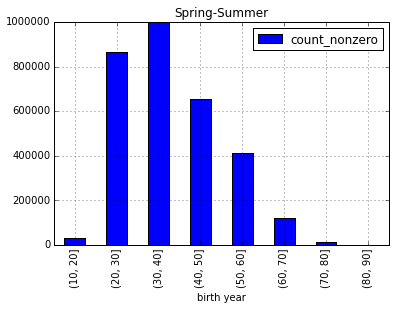

In [6]:
#Plotting the age distribution grouped in 10 year bins
bins = np.arange(10, 99, 10)
sprsu.age.groupby(pd.cut(sprsu.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Spring-Summer", grid=True)
sprsu.age_dist = sprsu.age.groupby(pd.cut(sprsu.age, bins)).agg([count_nonzero])

In [7]:
#Calculating KS Statistic for normal fit
ksW=scipy.stats.kstest(sprsu.age_dist, 'norm')
print "Spring and summer, normal fit", ksW

Spring and summer, normal fit (1.0, 0.0)


In [8]:
#Calculating KS Satistic for poisson fit
ksW1=scipy.stats.kstest(sprsu.age_dist, 'cauchy')
print "Spring and summer, poisson fit", ksW1

Spring and summer, poisson fit (0.99999968114263571, 0.0)


In [29]:
#Calculating Anderson test for normal fit
andtst = scipy.stats.anderson(sprsu.age.dropna(), dist='norm')
print "Spring and summer, normal fit", andtst

Spring and summer, normal fit (43659.255940694828, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [30]:
#Calculating anderson test for exponential fit
andtst1 = scipy.stats.anderson(sprsu.age.dropna(), dist='expon')
print "Spring and summer, exponential fit", andtst1

Spring and summer, exponential fit (723861.92352395458, array([ 0.922,  1.078,  1.341,  1.606,  1.957]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


As a result of both KS and anderson tests we can confirm that for the fall spring summer period the age of the subscribers do not fit like a normal, a poisson or a exponential distributions